In [1]:
import os
import bluepysnap  # https://bluebrainsnap.readthedocs.io/en/stable/
import neurom  # https://neurom.readthedocs.io/en/stable/
import pandas
import numpy
import scipy

from neurom import viewer

fn_extr = "/gpfs/bbp.cscs.ch/project/proj83/jira-tickets/NSETM-1948-extract-hex-O1/data/O1_data_anatomy/circuit_config.json"
circ_extr = bluepysnap.Circuit(fn_extr)


### Neuron populations and their properties

The model contains a number of neuron (or node) populations. Let's list them, then I'll explain them

In [2]:
print(circ_extr.nodes.population_names)

['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']


We find five populations. One population is the most important one: 'S1nonbarrel_neurons' denotes the neurons actually in the model. The ones that can be simulated. The other four denote external populations that innervate the 'S1nonbarrel_neurons':

'POm' and 'VPM' are innervating neurons from those thalamic nuclei respectively. Representing a "matrix-type" and "core-type" projection respectively.
'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical' and 'external_midrange__S1nonbarrel_neurons__chemical' denote nonbarrel S1 neurons outside the modeled population that innervate the modeled population. The difference between them is as follows: 'external_midrange...' innervates via long-range connections, while 'external_S1...' innervates via local connections. For an explanation of "local" vs. "long-range" connections, see the accompanying manuscript. 


Now we can load the properties of the neurons in these populations.

In [3]:
lst_properties = ['layer', 'region', 'synapse_class', 'population',
                  'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
                  'morph_class', 'model_type', 'mtype', 'morphology',
                  'x', 'y', 'z']
n_props = circ_extr.nodes.get(properties=lst_properties)
display(n_props.loc['S1nonbarrel_neurons'])

layer region synapse_class           population orientation_x  \
node_ids                                                                 
0            1   S1FL           INH  S1nonbarrel_neurons      0.517516   
1            1    S1J           INH  S1nonbarrel_neurons      0.668476   
2            1    S1J           INH  S1nonbarrel_neurons      0.680421   
3            1   S1FL           INH  S1nonbarrel_neurons      0.363595   
4            1   S1FL           INH  S1nonbarrel_neurons      0.598207   
...        ...    ...           ...                  ...           ...   
211707       5   S1FL           INH  S1nonbarrel_neurons      0.497035   
211708       5   S1FL           INH  S1nonbarrel_neurons       0.35091   
211709       5   S1FL           INH  S1nonbarrel_neurons      0.747416   
211710       5   S1FL           INH  S1nonbarrel_neurons       0.69289   
211711       5   S1FL           INH  S1nonbarrel_neurons      0.754461   

         orientation_y orientation_z orientation_w morph_class   model_type  \
node_ids                                                                      
0            -0.076986     -0.570522      0.633052         INT  biophysical   
1             0.179932     -0.393645       0.60482         INT  biophysical   
2             0.206931     -0.373016      0.595874         INT  biophysical   
3            -0.284571     -0.649024      0.604637         INT  biophysical   
4              0.03663     -0.480952      0.639915         INT  biophysical   
...                ...           ...           ...         ...          ...   
211707        0.645053      0.573805      0.087235         INT  biophysical   
211708       -0.249234     -0.672199      0.602406         INT  biophysical   
211709        0.521465      0.175918       0.37215         INT  biophysical   
211710        0.163884     -0.331654      0.618911         INT  biophysical   
211711        0.269133     -0.113989      0.587676         INT  biophysical   

           mtype                                         morphology  \
node_ids                                                              
0         L1_DAC  sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...   
1         L1_DAC              C270106A_-_Scale_x1.000_y1.025_z1.000   
2         L1_DAC  sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...   
3         L1_DAC      sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000   
4         L1_DAC              C270106C_-_Scale_x1.000_y0.975_z1.000   
...          ...                                                ...   
211707     L5_BP   C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1   
211708     L5_BP                                C240300C1_-_Clone_0   
211709     L5_BP     rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000   
211710     L5_BP   C240300C1_-_Scale_x1.000_y0.950_z1.000_-_Clone_1   
211711     L5_BP  rp110127_L5-2_idC_-_Scale_x1.000_y0.975_z1.000...   

                    x            y            z  
node_ids                                         
0         4652.171846 -1930.525524 -1836.395782  
1         4977.735899 -1641.041348 -2140.579908  
2         5011.718764 -1565.779688 -2212.599874  
3         4266.789018  -1804.71183 -1531.716011  
4         4779.539653 -1259.558916 -1996.720501  
...               ...          ...          ...  
211707    4053.191307   -663.72276 -2140.027223  
211708    4002.636889 -1382.419711 -2641.743271  
211709    4228.866737  -909.053724 -2608.261691  
211710    3961.170919 -1813.695181 -2399.488534  
211711    3856.704544  -853.672616 -2301.961282  

[211712 rows x 15 columns]

'layer', 'region' specify in which cortical region and layer a neuron was placed.

'x', 'y', 'z' specify the exact coordinate (in um) in the atlas that a neuron was placed at.

'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w' define a quarternion that specifies the rotation that is applied to the neuron morphology in placement.

'synapse_class', 'morph_class', 'mtype' specify the class of neuron in terms of being excitatory vs inhibitory, pyramidal vs interneuron and the morphological type.

'morphology' specifies the name of the morphological reconstruction of the neuron

'model_type' specifies whether a neuron is actually part of the model that can be simulated ("biophysical") or an external innervator ("virtual"). As explained above, all 'S1nonbarrel_neurons' are "biophysical", the others are all "virtual".


Note that for the "virtual" neurons some properties are unassigned and therefore reported as NaN. 

In [4]:
display(n_props.loc['external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'])  # Some columns are NaN

layer region synapse_class population orientation_x orientation_y  \
node_ids                                                                     
0            1   S1FL           NaN        NaN           NaN           NaN   
1            1   S1DZ           NaN        NaN           NaN           NaN   
2            1   S1DZ           NaN        NaN           NaN           NaN   
3            1    S1J           NaN        NaN           NaN           NaN   
4            1    S1J           NaN        NaN           NaN           NaN   
...        ...    ...           ...        ...           ...           ...   
549121       5   S1FL           NaN        NaN           NaN           NaN   
549122       5   S1FL           NaN        NaN           NaN           NaN   
549123       5   S1FL           NaN        NaN           NaN           NaN   
549124       5   S1FL           NaN        NaN           NaN           NaN   
549125       5   S1DZ           NaN        NaN           NaN           NaN   

         orientation_z orientation_w morph_class model_type   mtype  \
node_ids                                                              
0                  NaN           NaN         INT        NaN  L1_DAC   
1                  NaN           NaN         INT        NaN  L1_DAC   
2                  NaN           NaN         INT        NaN  L1_DAC   
3                  NaN           NaN         INT        NaN  L1_DAC   
4                  NaN           NaN         INT        NaN  L1_DAC   
...                ...           ...         ...        ...     ...   
549121             NaN           NaN         INT        NaN   L5_BP   
549122             NaN           NaN         INT        NaN   L5_BP   
549123             NaN           NaN         INT        NaN   L5_BP   
549124             NaN           NaN         INT        NaN   L5_BP   
549125             NaN           NaN         INT        NaN   L5_BP   

         morphology            x            y            z  
node_ids                                                    
0               NaN  4247.694436 -2052.149704 -1565.754271  
1               NaN  4549.543287 -2180.385776 -1920.994678  
2               NaN  5172.201284 -1293.641236 -2317.567691  
3               NaN  5026.069787 -2190.808407 -2270.395264  
4               NaN  4933.646602 -2071.110027 -2289.978386  
...             ...          ...          ...          ...  
549121          NaN  3571.203692 -1697.376869  -2107.75146  
549122          NaN  4098.841431  -442.095737 -2405.330376  
549123          NaN  3500.172962  -473.319652 -1964.548743  
549124          NaN  3898.694071  -546.159935 -2230.841431  
549125          NaN  4464.621781  -402.205632 -2589.139725  

[549126 rows x 15 columns]

### Neuron morphologies

For the 'S1nonbarrel_neurons' population, we can then load their morphologies with some simple helper functions.

For this example, we load and draw and exemplary neuron. For more that can be done with the loaded morphology, see the NeuroM documentation linked in the first cell of this notebook.

/gpfs/bbp.cscs.ch/home/reimann/venvs/py38/lib/python3.8/site-packages/neurom/view/common.py:108: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(subplot, **params)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Neuron'}, xlabel='x', ylabel='y'>)

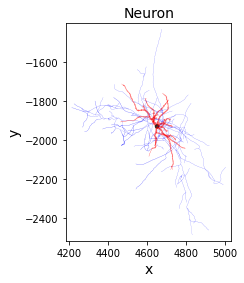

In [13]:
S1nonbarrel_cfg = circ_extr.config["networks"]["nodes"][0]["populations"]["S1nonbarrel_neurons"]

def transform_neuron(nrn_morph, neuron_row):
    rot = scipy.spatial.transform.Rotation.from_quat(neuron_row[["orientation_x", "orientation_y",
                                                                 "orientation_z", "orientation_w"]].values)
    rot = neurom.geom.transform.Rotation(rot.as_matrix())
    tl = neurom.geom.transform.Translation(neuron_row[["x", "y", "z"]].values)
    return nrn_morph.transform(rot).transform(tl)
    
def load_neuron(population_cfg, neuron_row, transform=True):
    assert neuron_row["model_type"] == "biophysical", "Cannot load morphologies of virtual neurons"
    fn = os.path.join(
        population_cfg["alternate_morphologies"]["neurolucida-asc"],
        neuron_row["morphology"] + ".asc"
    )
    nrn = neurom.load_neuron(fn)
    if transform:
        nrn = transform_neuron(nrn, neuron_row)
    return nrn

nrn_morph = load_neuron(S1nonbarrel_cfg, n_props.loc[('S1nonbarrel_neurons', 0)])
viewer.draw(nrn_morph)

### Synaptic connectivity

The synaptic connectivity of the model is accessed using circ_extr.edges.
As an example, let's find out which neurons innervate an exemplary neuron

In [5]:
# The method we use below requires node ids as input. So we load the ids of the "S1nonbarrel_neurons"
node_ids = circ_extr.nodes.ids().filter_population("S1nonbarrel_neurons")

# This will be our examplary neuron. Let's look at its properties
display(n_props.loc[node_ids[0]])

# Which neurons are afferent to the first one?
aff = circ_extr.edges.afferent_nodes(node_ids[0])
# What's returned can be used as index into the neuron properties data frame
aff_props = n_props.loc[aff]

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["region"]["S1nonbarrel_neurons"].value_counts())

layer                                                            1
region                                                        S1FL
synapse_class                                                  INH
population                                     S1nonbarrel_neurons
orientation_x                                             0.517516
orientation_y                                            -0.076986
orientation_z                                            -0.570522
orientation_w                                             0.633052
morph_class                                                    INT
model_type                                             biophysical
mtype                                                       L1_DAC
morphology       sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...
x                                                      4652.171846
y                                                     -1930.525524
z                                                     -1836.39

S1FL    63
S1DZ    30
S1J      3
Name: region, dtype: int64

We see that the exemplary neuron is a L1_DAC neuron in the S1FL (front limb) area. From within the modeled population, it is mostly innervated by other S1FL neurons.

Let's see what external neurons innervate it.

In [6]:
# External innervation via local connections
display(aff_props["region"]["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"].value_counts())

# External innervation via long-range connections
display(aff_props["region"]["external_midrange__S1nonbarrel_neurons__chemical"].value_counts())


S1FL     37
S1DZ      9
S1J       8
S1ULp     6
Name: region, dtype: int64

S1ULp    135
S1HL      84
S1FL      43
S1DZ      37
S1J       36
S1Tr      36
S1DZO      6
S1Sh       5
Name: region, dtype: int64

Unsurprisingly, we see that external innervation via local connection comes also mostly from S1FL. For long-range connections though, S1ULp is dominating.

Properties of the synapses (such as their dendritic and axon locations) can be accessed as follows:

In [10]:
circ_extr.edges.afferent_edges(node_ids[0], properties=['afferent_section_id',
                                                        'afferent_segment_id', 
                                                        'afferent_segment_offset'])

afferent_section_id  \
population                                       edge_ids                       
POm__S1nonbarrel_neurons__chemical               0                        208   
                                                 1                        208   
                                                 2                        201   
                                                 3                        201   
                                                 4                        212   
...                                                                       ...   
external_midrange__S1nonbarrel_neurons__chemical 543                      176   
                                                 544                      178   
                                                 545                      185   
                                                 546                      185   
                                                 547                      182   

                                                          afferent_segment_id  \
population                                       edge_ids                       
POm__S1nonbarrel_neurons__chemical               0                         96   
                                                 1                         47   
                                                 2                        107   
                                                 3                        100   
                                                 4                         97   
...                                                                       ...   
external_midrange__S1nonbarrel_neurons__chemical 543                        8   
                                                 544                       78   
                                                 545                       71   
                                                 546                      146   
                                                 547                        9   

                                                          afferent_segment_offset  
population                                       edge_ids                          
POm__S1nonbarrel_neurons__chemical               0                       0.687199  
                                                 1                       0.731116  
                                                 2                       3.612747  
                                                 3                       1.182481  
                                                 4                        0.85173  
...                                                                           ...  
external_midrange__S1nonbarrel_neurons__chemical 543                     1.091046  
                                                 544                     0.093693  
                                                 545                     0.189781  
                                                 546                      0.38004  
                                                 547                     1.365389  

[1179 rows x 3 columns]

These were just simple examples. For more analyses on the connectivity, see the SONATA documentation, and the bluepysnap documentation linked in the first cell.